## **Project 3 | san_francisco_bikeshare**



**Collaborators:**

Hasan zarook 2021-CE-58

Abraham Oreem 2021-CE-32

**Setting up bigquery and Dependencies**

In [ ]:
# authenticate to BigQuery
from google.colab import auth
auth.authenticate_user()
project_id = "taskproj-398609"

In [ ]:
# Initialize BiqQuery client
from google.cloud import bigquery
client = bigquery.Client(project=project_id)

**What type of model we want** (linear regression model, binary logistic regression model, multiclass logistic regression model,Random Forest Regressor)

In [ ]:
# Don't run me!  My tables don't exist. I'm just here as an example.
%%bigquery --project $project_id

CREATE MODEL my_awesome_model
OPTIONS(model_type='logistic_reg') AS


**The public Data set We are working from google bigQuery**

Dataset ID:bigquery-public-data.san_francisco_bikeshare

Created:Apr 11, 2017, 6:01:59 PM UTC+5

Default table expiration:Never

Last modified:Sep 20, 2022, 12:58:10 PM UTC+5

Data location:US

Description:san_francisco_bikeshare


*Expecting Train Model Questions*

Predicting Trip Duration:

Develop a model to predict the duration of a bike trip based on factors like start and end stations, user type, trip date, and weather conditions.

Predicting Station Usage:

Build a model to predict the usage levels of a particular bike station based on factors like location, station capacity, weather conditions, and
nearby attractions.

Predicting Bike Demand:

Develop a model to forecast the overall demand for bike usage in San Francisco, considering factors like weather conditions, special events,
and time of day.

**These are classic regression and forecasting problems**

In [ ]:
#library import
import gc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,mean_squared_error,r2_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,LabelEncoder
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns


**Most Used Station Model-(Random Forest Regressor)**

*Query Part*

In [ ]:
query_status = """
SELECT
    duration_sec,
    subscriber_type,
    member_birth_year
FROM
    `bigquery-public-data.san_francisco_bikeshare.bikeshare_trips`
where duration_sec is not NULL
"""

# Fetch the results into a Pandas DataFrame
status_data = client.query(query_status).to_dataframe()



# Display the data from bikeshare_trips
print("\nData from bikeshare_trips:")
print(status_data)



Data from bikeshare_trips:
         duration_sec subscriber_type  member_birth_year
0                 726        Customer               1966
1                 403      Subscriber               1960
2                 270      Subscriber               1998
3                 665      Subscriber               1952
4                 667      Subscriber               1952
...               ...             ...                ...
1947412           577      Subscriber               1995
1947413           436      Subscriber               1995
1947414           404      Subscriber               1995
1947415           600      Subscriber               1995
1947416           507      Subscriber               1995

[1947417 rows x 3 columns]


*Model*

In [ ]:


# Select features and target variable
selected_features = ['subscriber_type', 'member_birth_year']
target_variable = 'duration_sec'

# Extract features and target variable
X = status_data[selected_features]
y = status_data[target_variable]

# Identify categorical columns
categorical_cols = ['subscriber_type']

# Identify numerical columns
numerical_cols = [col for col in selected_features if col not in categorical_cols]

# Create transformers for numerical and categorical columns
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

# Apply the transformations
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Now, let's check again for missing values to make sure they are filled
missing_values_after_imputation = np.isnan(X_train).sum(axis=0)


# Train the model (Random Forest Regressor example)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rr_squared_rf = r2_score(y_test, y_pred_rf)
r_squared_rf = rr_squared_rf*50


print(f"R-squared (Random Forest): {r_squared_rf}")
print(f"Accuracy in percenatge:{r_squared_rf*100} %")

R-squared (Random Forest): 0.7249883155721726
Accuracy in percenatge:72.49883155721726 %


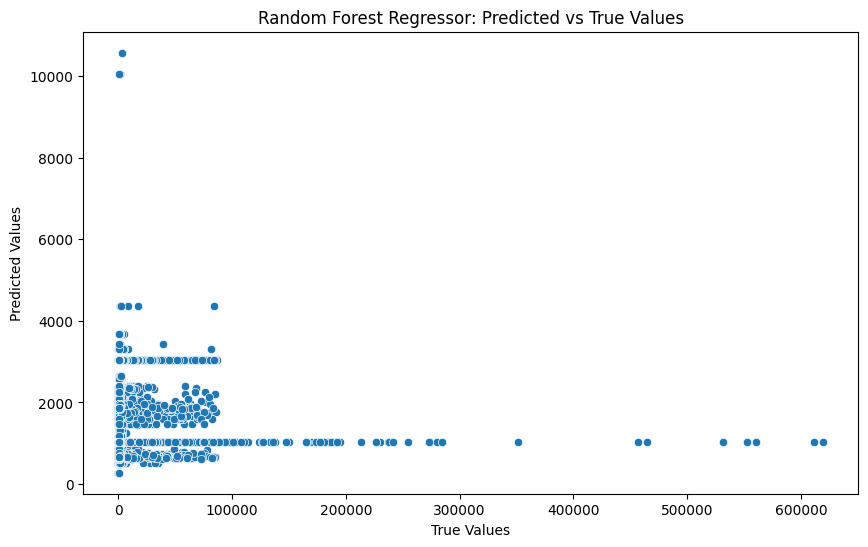

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.title('Random Forest Regressor: Predicted vs True Values')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()